# Step 1: Importing Necessary Libraries
**This is the step where we import all the libraries we need for our work**

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import os

%matplotlib inline
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.1f}'.format)

# Step 2: Loading The Dataset
**This is the step where we load our dataset using pandas, in this case we will load a dataset called** [Top Spotify Songs 2023](http://https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023)

In [33]:
#filepath of the dataset
filepath = '/kaggle/input/top-spotify-songs-2023/spotify-2023.csv'

#load the spotify dataset
spotify_df = pd.read_csv(filepath, encoding = 'latin-1')


# Step 3: EDA and Data Cleaning
**This is the step where we analyze the data to know if there are problems in it and solving these problems**

In [34]:
#first 5 rows of the data
spotify_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


**First thing I discovered is there are three columns released_year, released_month and released_day that isn't necessary to represent date in three column, so I decided to use these three columns to represent date in one column only**

In [35]:
#combine the columns into a single 'release_date' column
spotify_df['release_date'] = pd.to_datetime(spotify_df['released_year'].astype(str) + '-' +
                                    spotify_df['released_month'].astype(str) + '-' +
                                    spotify_df['released_day'].astype(str))

#drop the original year, month, and day columns
spotify_df.drop(columns=['released_year', 'released_month', 'released_day'], inplace=True)

In [36]:
spotify_df

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6,2023-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,953,0,91473363,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3,2022-11-03
949,Bigger Than The Whole Sky,Taylor Swift,1,1180,0,121871870,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6,2022-10-21
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,573,0,73513683,2,0,7,0,0,92,C#,Major,80,81,67,4,0,8,6,2022-11-03
951,En La De Ella,"Feid, Sech, Jhayco",3,1320,0,133895612,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5,2022-10-20


**Another thing I discovered is there are columns that we are not gonna use or have benefit from them like the bpm (beats per minute), key and mode columns so we will drop them**

In [37]:
spotify_df.drop(columns=['bpm', 'key', 'mode'], inplace=True)

In [38]:
#the dataset after dropping the columns
spotify_df

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45,10,826,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,1474,48,133716286,48,126,58,14,382,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,14,949,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125,12,548,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,15,425,65,23,80,14,63,11,6,2023-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,953,0,91473363,61,13,37,1,0,60,24,39,57,0,8,3,2022-11-03
949,Bigger Than The Whole Sky,Taylor Swift,1,1180,0,121871870,4,0,8,0,0,42,7,24,83,1,12,6,2022-10-21
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,573,0,73513683,2,0,7,0,0,80,81,67,4,0,8,6,2022-11-03
951,En La De Ella,"Feid, Sech, Jhayco",3,1320,0,133895612,29,26,17,0,0,82,67,77,8,0,12,5,2022-10-20


In [39]:
#check if there are any duplicated rows
spotify_df.duplicated().sum()

0

In [40]:
#check for duplicates in the 'track_name' column
spotify_df[spotify_df['track_name'].duplicated()]

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
417,Die For You,Joji,1,1703,0,246390068,38,45,36,16,0,47,15,52,38,13,29,5,2022-11-04
466,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",2,10585,0,473248298,126,108,406,0,0,60,86,32,88,0,34,6,1950-01-01
482,SPIT IN MY FACE!,ThxSoMch,1,573,0,301869854,1,0,18,0,24,70,57,57,9,20,11,7,2022-10-31
616,Take My Breath,The Weeknd,1,6392,0,432702334,174,73,344,0,0,75,53,74,2,0,11,5,2021-08-06
764,About Damn Time,Lizzo,1,9021,0,723894473,242,49,272,21,24,84,72,74,10,0,34,7,2022-04-14
825,Flowers,Lauren Spencer Smith,1,801,0,184826429,42,9,24,1,1,70,31,44,84,0,9,39,2021-08-09
831,Daylight,Harry Styles,1,2775,0,290833204,21,11,40,0,0,69,63,45,48,0,18,4,2022-05-20
852,Numb,"Marshmello, Khalid",2,3879,2,295307001,107,76,86,1,9,91,63,77,12,1,10,5,2022-06-10
873,SNAP,Rosa Linn,1,1818,0,711366595,3,0,63,0,353,56,52,64,11,0,45,7,2022-03-19
922,Miss You,Southstar,1,2020,0,154356956,77,10,119,0,40,66,24,58,17,0,19,5,1982-05-16


In [41]:
#convert 'streams' column to numeric format

# spotify_df['streams'] = pd.to_numeric(spotify_df['streams']) => this will result an error due to a weird value in row 574

In [42]:
#drop the row that has this weird value that causes above error
spotify_df = spotify_df.drop([574])

In [43]:
#convert 'streams' column to numeric format after dropping that row
spotify_df['streams'] = pd.to_numeric(spotify_df['streams'])

In [44]:
#sort the dataset by 'streams' in descending order
spotify_df = spotify_df.sort_values(by='streams', ascending=False)

#drop duplicates in 'track_name', keeping the first occurrence (highest streams)
spotify_df = spotify_df.drop_duplicates(subset='track_name', keep='first')

In [45]:
#check for duplicates in the 'track_name' column
spotify_df[spotify_df['track_name'].duplicated()]

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date


**We above checked if there are duplicated rows to drop and there wan't any but when I checked the duplicates in 'track_name' column there was some has the same track name so I decided to drop the duplicates that has the same track name but keeping the row that has most streams from them**

In [46]:
#information about the data
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 55 to 123
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            942 non-null    object        
 1   artist(s)_name        942 non-null    object        
 2   artist_count          942 non-null    int64         
 3   in_spotify_playlists  942 non-null    int64         
 4   in_spotify_charts     942 non-null    int64         
 5   streams               942 non-null    int64         
 6   in_apple_playlists    942 non-null    int64         
 7   in_apple_charts       942 non-null    int64         
 8   in_deezer_playlists   942 non-null    object        
 9   in_deezer_charts      942 non-null    int64         
 10  in_shazam_charts      892 non-null    object        
 11  danceability_%        942 non-null    int64         
 12  valence_%             942 non-null    int64         
 13  energy_%              94

**I discovered from the information above that there are columns that are object needs to be numeric like in_shazam_charts column for example so we want to convert them to numeric columns**

In [47]:
#numbers of nulls in each column in the dataset
spotify_df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
release_date             0
dtype: int64

**We have a problem that the 'in_shazam_charts' column has nulls and I don't want to replace nulls with anything like median or mean becaues I don't want to provide false data and at the same time I don't want to drop rows that has nulls because If I did this the other information about the tracks will be dropped too so I decided to drop this column**

In [48]:
#dropping 'in_shazam_charts' column
spotify_df.drop(columns = ['in_shazam_charts'], inplace = True)

In [49]:
#numbers of nulls in each column in the dataset after dropping 'in_shazam_charts' column
spotify_df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
release_date            0
dtype: int64

In [50]:
#information about the data
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 55 to 123
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            942 non-null    object        
 1   artist(s)_name        942 non-null    object        
 2   artist_count          942 non-null    int64         
 3   in_spotify_playlists  942 non-null    int64         
 4   in_spotify_charts     942 non-null    int64         
 5   streams               942 non-null    int64         
 6   in_apple_playlists    942 non-null    int64         
 7   in_apple_charts       942 non-null    int64         
 8   in_deezer_playlists   942 non-null    object        
 9   in_deezer_charts      942 non-null    int64         
 10  danceability_%        942 non-null    int64         
 11  valence_%             942 non-null    int64         
 12  energy_%              942 non-null    int64         
 13  acousticness_%        94

**All things is good in the information above except that 'in_deezer_playlists' column should be integer not object so we will solve that now**

In [51]:
#convert 'streams' column to numeric format

# spotify_df['in_deezer_playlists'] = pd.to_numeric(spotify_df['in_deezer_playlists']) => this will result an error due to a comma in a number 

In [52]:
#remove commas from 'in_shazam_charts' column due to the above error
spotify_df['in_deezer_playlists'] = spotify_df['in_deezer_playlists'].str.replace(',', '')

#convert 'in_shazam_charts' column to numeric
spotify_df['in_deezer_playlists'] = pd.to_numeric(spotify_df['in_deezer_playlists'])

In [53]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 55 to 123
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            942 non-null    object        
 1   artist(s)_name        942 non-null    object        
 2   artist_count          942 non-null    int64         
 3   in_spotify_playlists  942 non-null    int64         
 4   in_spotify_charts     942 non-null    int64         
 5   streams               942 non-null    int64         
 6   in_apple_playlists    942 non-null    int64         
 7   in_apple_charts       942 non-null    int64         
 8   in_deezer_playlists   942 non-null    int64         
 9   in_deezer_charts      942 non-null    int64         
 10  danceability_%        942 non-null    int64         
 11  valence_%             942 non-null    int64         
 12  energy_%              942 non-null    int64         
 13  acousticness_%        94

In [54]:
#datatypes of the columns after solving the the datatype problem
spotify_df.dtypes

track_name                      object
artist(s)_name                  object
artist_count                     int64
in_spotify_playlists             int64
in_spotify_charts                int64
streams                          int64
in_apple_playlists               int64
in_apple_charts                  int64
in_deezer_playlists              int64
in_deezer_charts                 int64
danceability_%                   int64
valence_%                        int64
energy_%                         int64
acousticness_%                   int64
instrumentalness_%               int64
liveness_%                       int64
speechiness_%                    int64
release_date            datetime64[ns]
dtype: object

**I think we are now good to go creating our Data Visualizations**

# Step 4: Data Visualizations
**This is the step we will create Data Visualizations to have better Image and gain insights from spotify data, this step is part of EDA**

In [55]:
spotify_df

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
55,Blinding Lights,The Weeknd,1,43899,69,3703895074,672,199,3421,20,50,38,80,0,0,9,7,2019-11-29
179,Shape of You,Ed Sheeran,1,32181,10,3562543890,33,0,6808,7,83,93,65,58,0,9,8,2017-01-06
86,Someone You Loved,Lewis Capaldi,1,17836,53,2887241814,440,125,1800,0,50,45,41,75,0,11,3,2018-11-08
620,Dance Monkey,Tones and I,1,24529,0,2864791672,533,167,3595,6,82,54,59,69,0,18,10,2019-05-10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,24094,78,2808096550,372,117,843,4,76,91,50,54,0,7,5,2018-10-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Overdrive,Post Malone,1,410,36,14780425,36,32,31,1,56,48,73,0,0,35,4,2023-07-14
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,293,8,11956641,5,2,30,2,93,68,65,42,0,12,25,2023-06-01
144,QUEMA,"Sog, Ryan Castro, Peso Pluma",3,437,31,11599388,17,29,26,3,79,92,89,5,0,6,5,2023-07-13
393,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",6,138,4,1365184,13,78,2,0,82,62,74,10,0,33,7,2022-12-22


## Top 10 Artists Have Most Streamed Songs in 2023⬆️

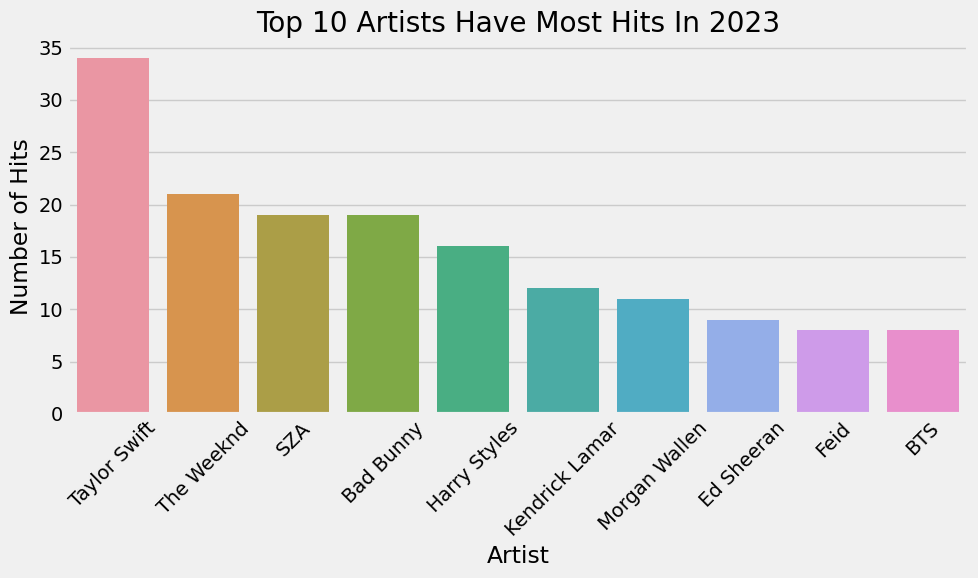

In [56]:
#count the number of songs released by each artist
artist_counts = spotify_df['artist(s)_name'].value_counts()

#select the top 10 artists
top_artists = artist_counts.head(10)

#the barplot represents Top 10 Artists Have Most Streamed Songs in 2023
plt.figure(figsize = (10, 6))

sns.barplot(x = top_artists.index, y = top_artists.values)

plt.title('Top 10 Artists Have Most Hits In 2023')
plt.xlabel('Artist')
plt.ylabel('Number of Hits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Top 10 Streamed Songs in 2023🎧

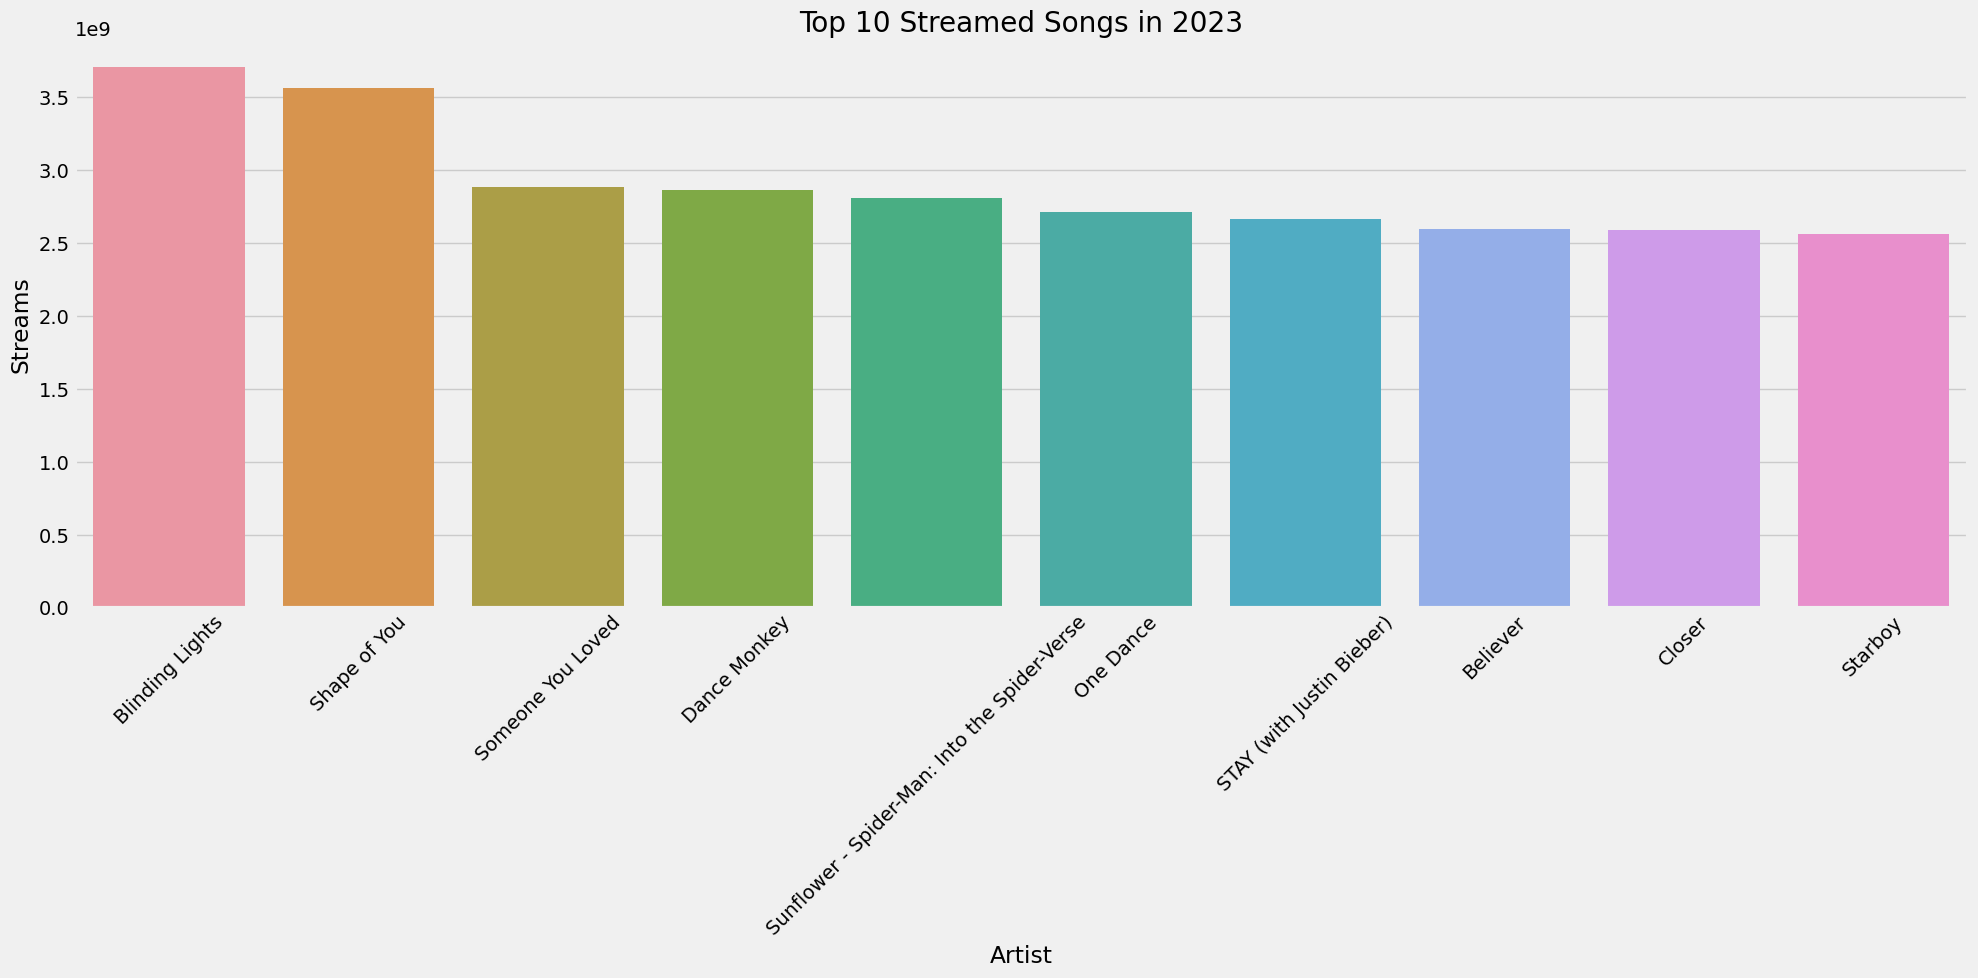

In [57]:
#the barplot represents Top 10 Streamed Songs in 2023
plt.figure(figsize = (20, 10))

sns.barplot(x = spotify_df.track_name[:10], y = spotify_df.streams)

plt.title('Top 10 Streamed Songs in 2023')
plt.xlabel('Artist')
plt.ylabel('Streams')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## Relationship Between The Number Of Artists In A Song and Streams In 2023🤔

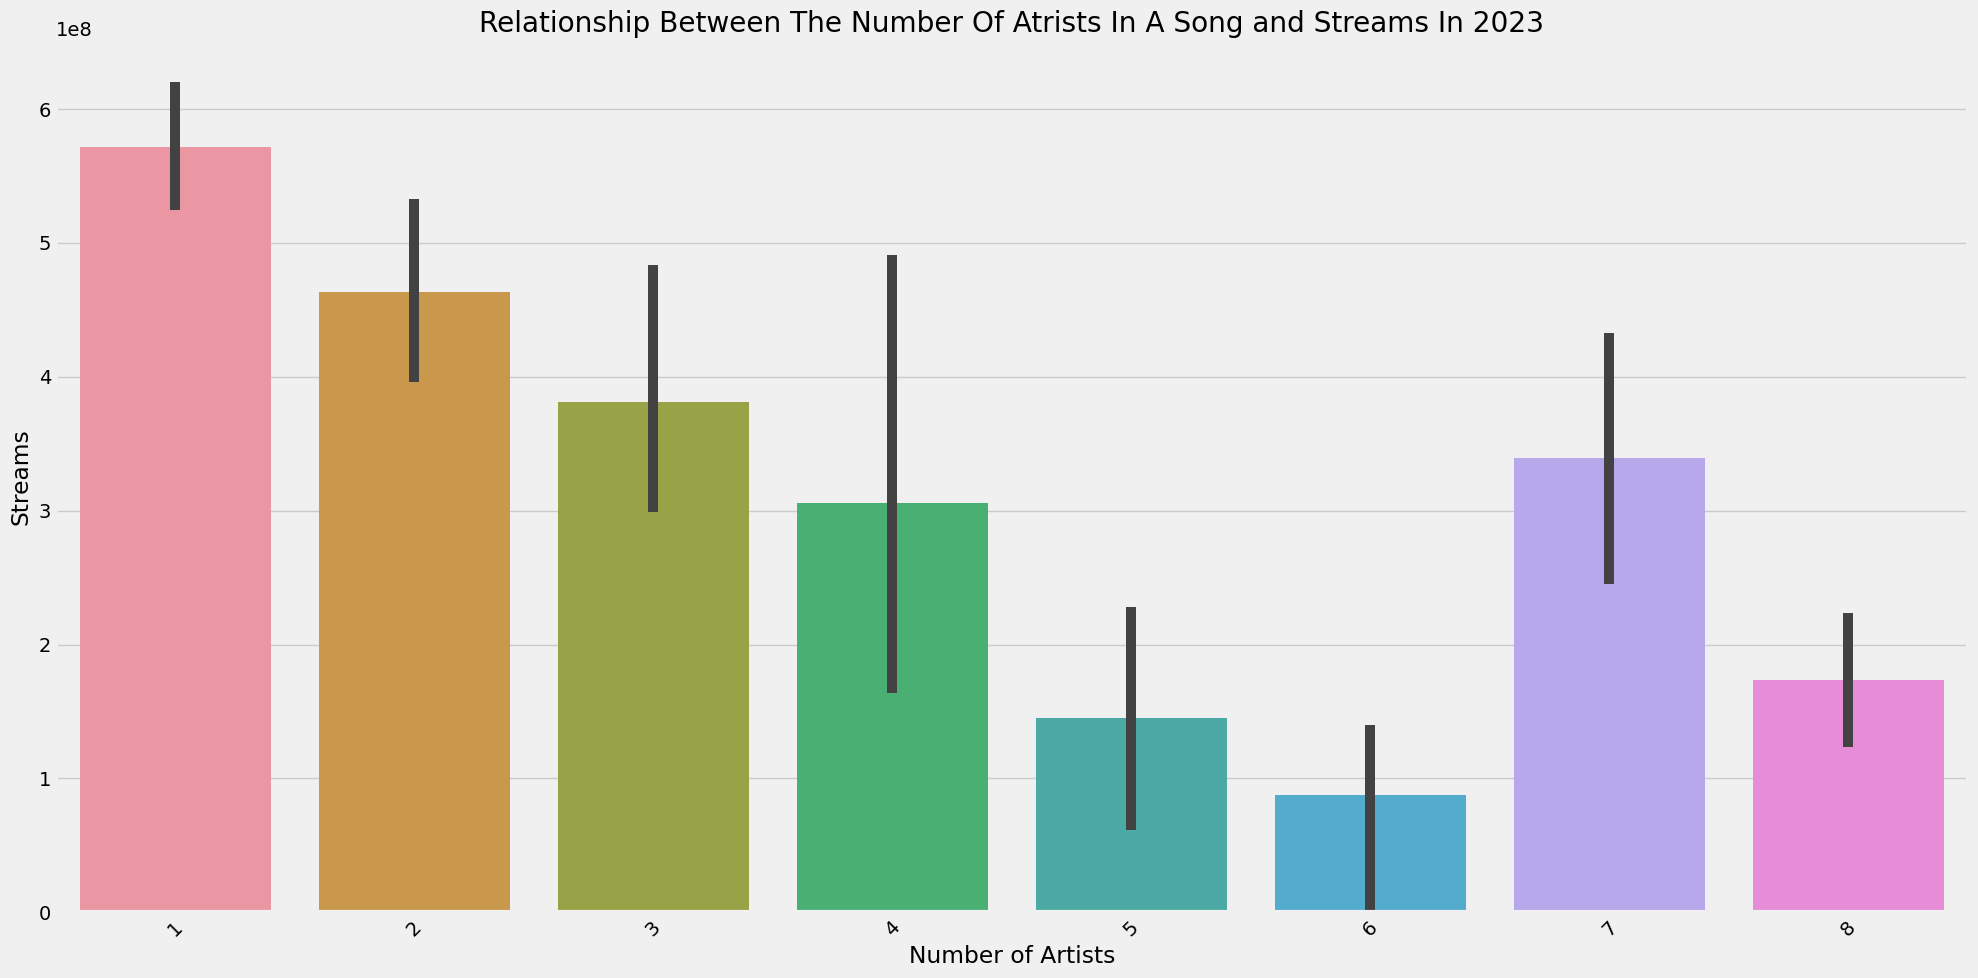

In [58]:
#the barplot represents Relationship Between The Number Of Atrists In A Song and Streams In 2023
plt.figure(figsize = (20, 10))

sns.barplot(x = spotify_df.artist_count, y = spotify_df.streams)

plt.title('Relationship Between The Number Of Atrists In A Song and Streams In 2023')
plt.xlabel('Number of Artists')
plt.ylabel('Streams')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## Relationship Between Most Streamed Songs And Platforms In 2023🤔

### Spotify PLatform

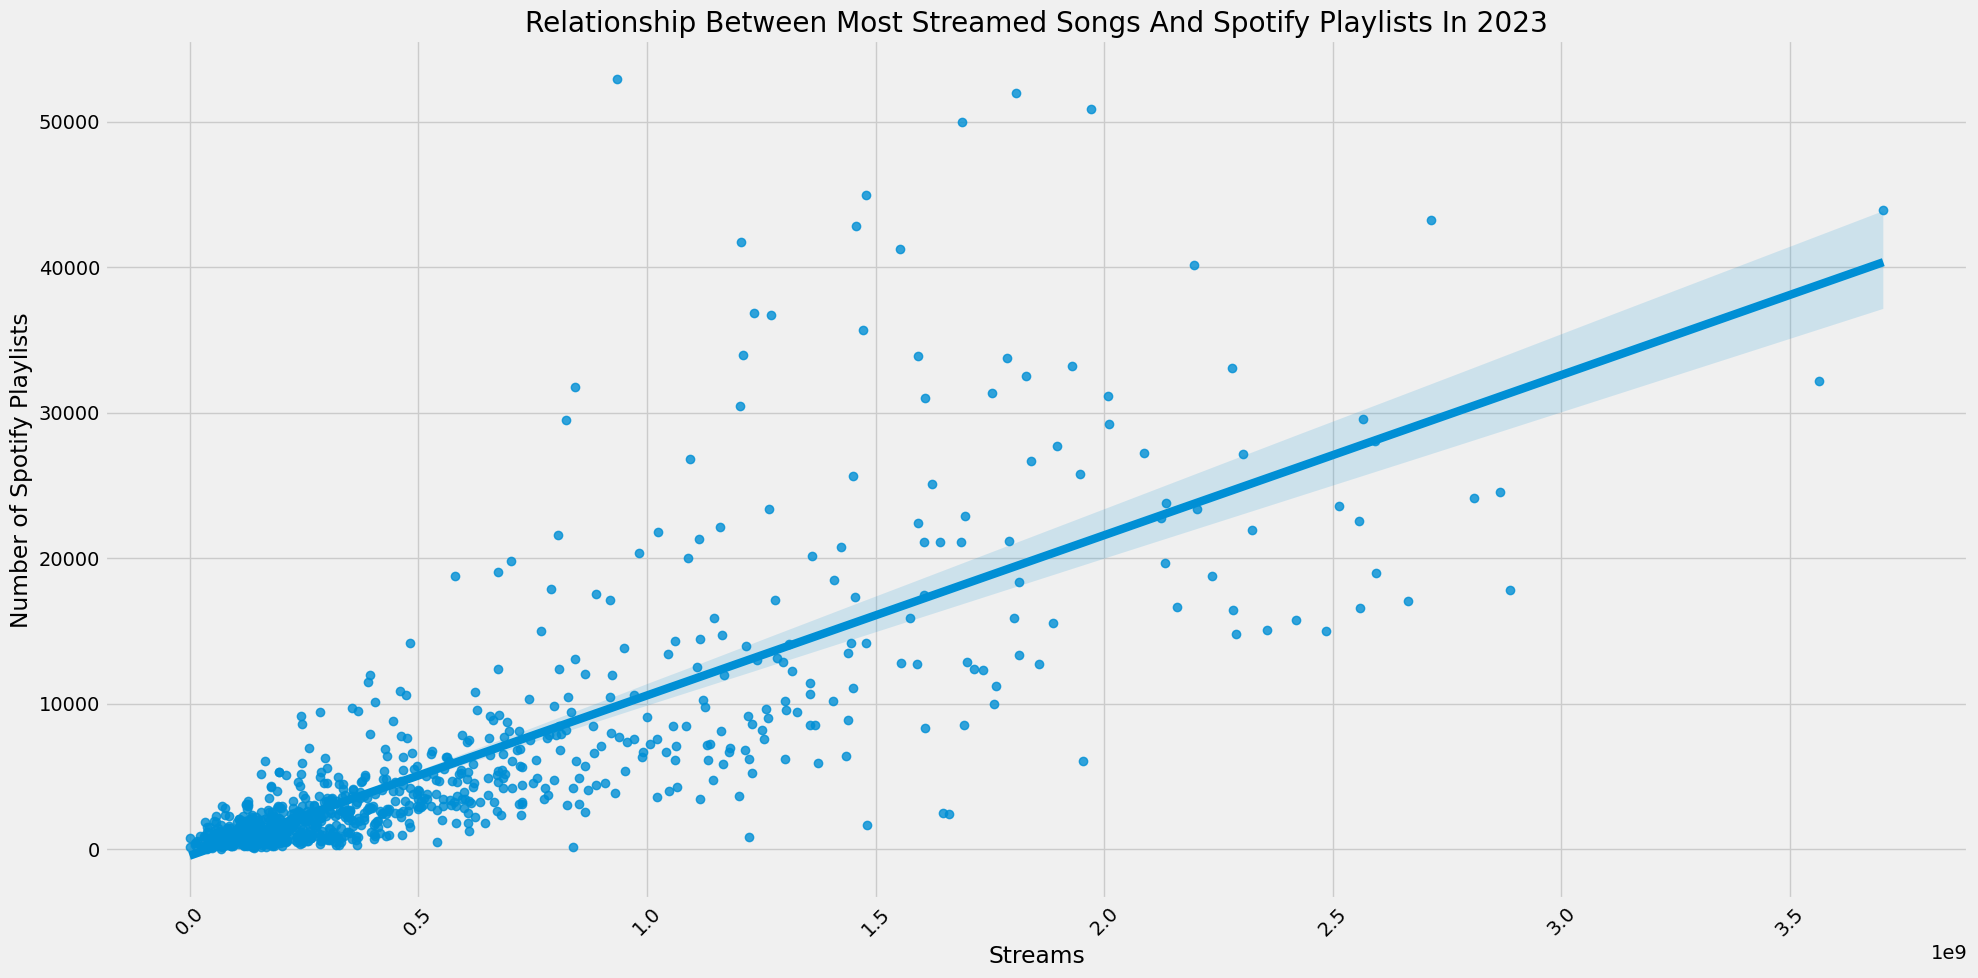

In [59]:
#the regplot (scatter plot with regression line) represents Relationship Between Most Streamed Songs And Spotify Playlists In 2023
plt.figure(figsize = (20, 10))

sns.regplot(x = 'streams', y = 'in_spotify_playlists', data = spotify_df, scatter = True, fit_reg = True)

plt.title('Relationship Between Most Streamed Songs And Spotify Playlists In 2023')
plt.xlabel('Streams')
plt.ylabel('Number of Spotify Playlists')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### Apple Platform

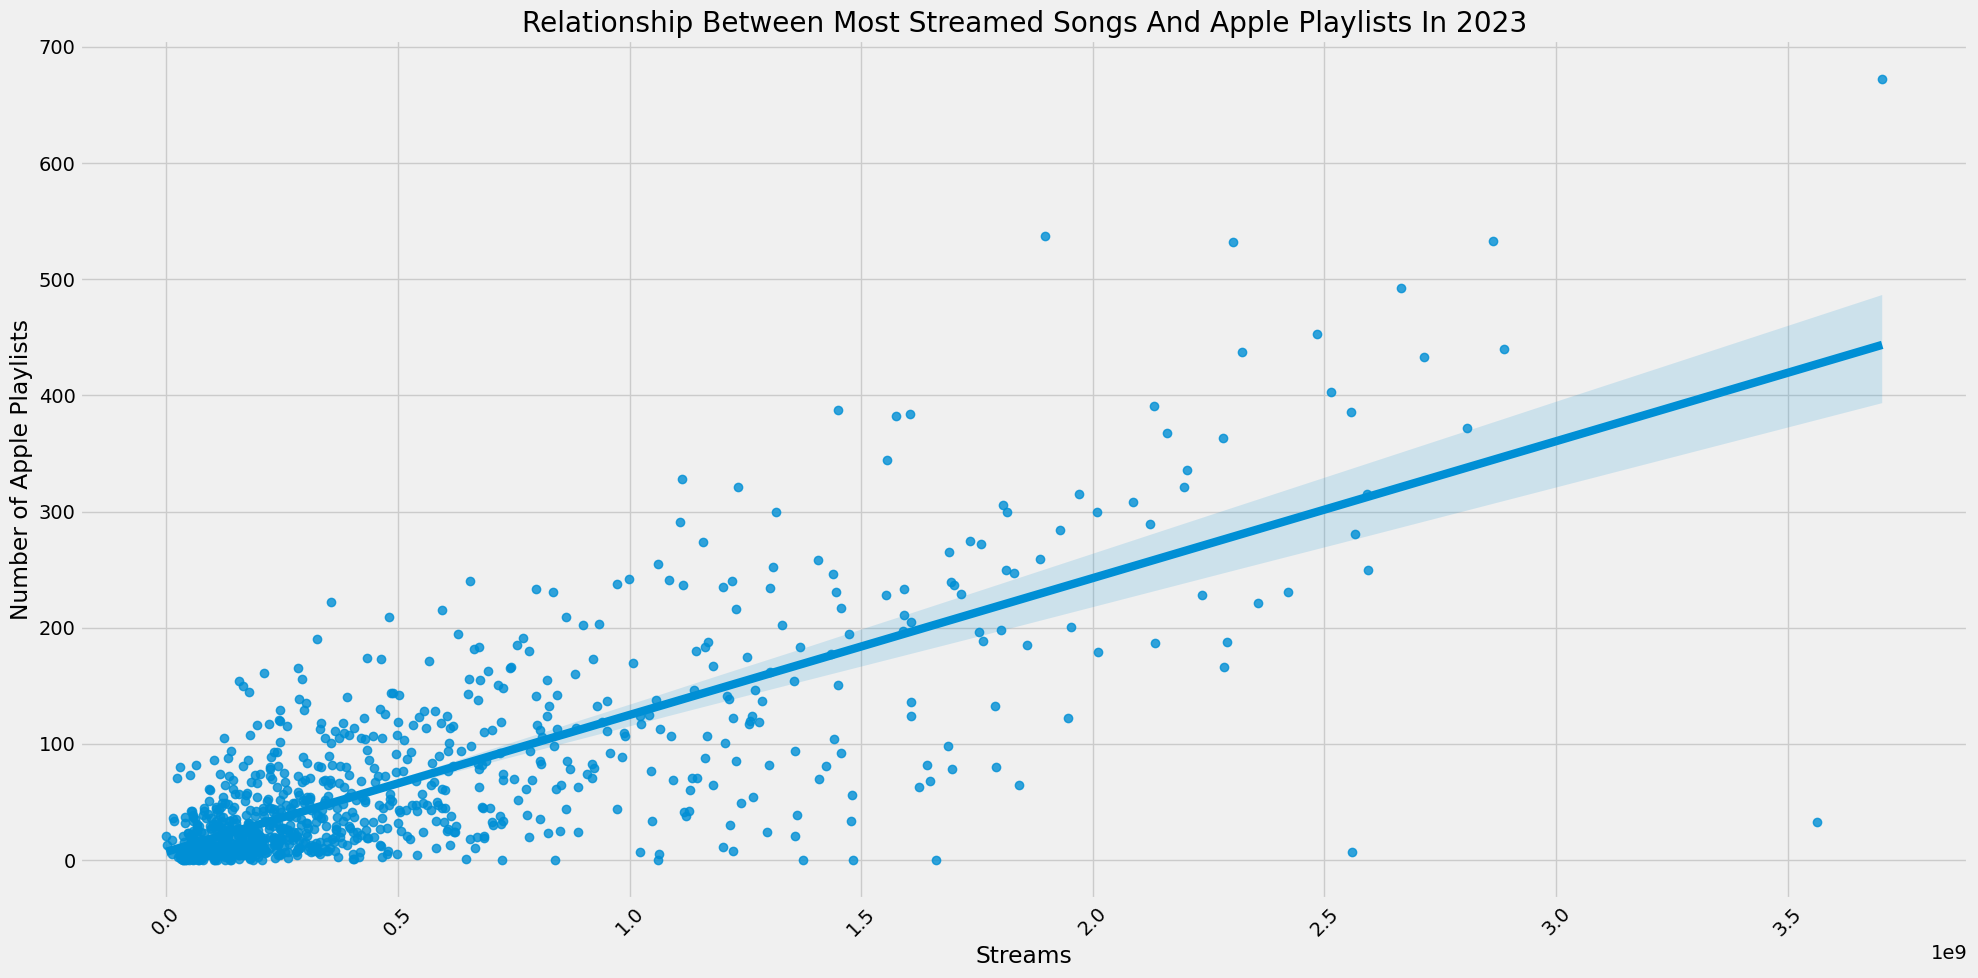

In [60]:
#the regplot (scatter plot with regression line) represents Relationship Between Most Streamed Songs And Apple Playlists In 2023
plt.figure(figsize = (20, 10))

sns.regplot(x = 'streams', y = 'in_apple_playlists', data = spotify_df, scatter = True, fit_reg = True)

plt.title('Relationship Between Most Streamed Songs And Apple Playlists In 2023')
plt.xlabel('Streams')
plt.ylabel('Number of Apple Playlists')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### Deezer Platform

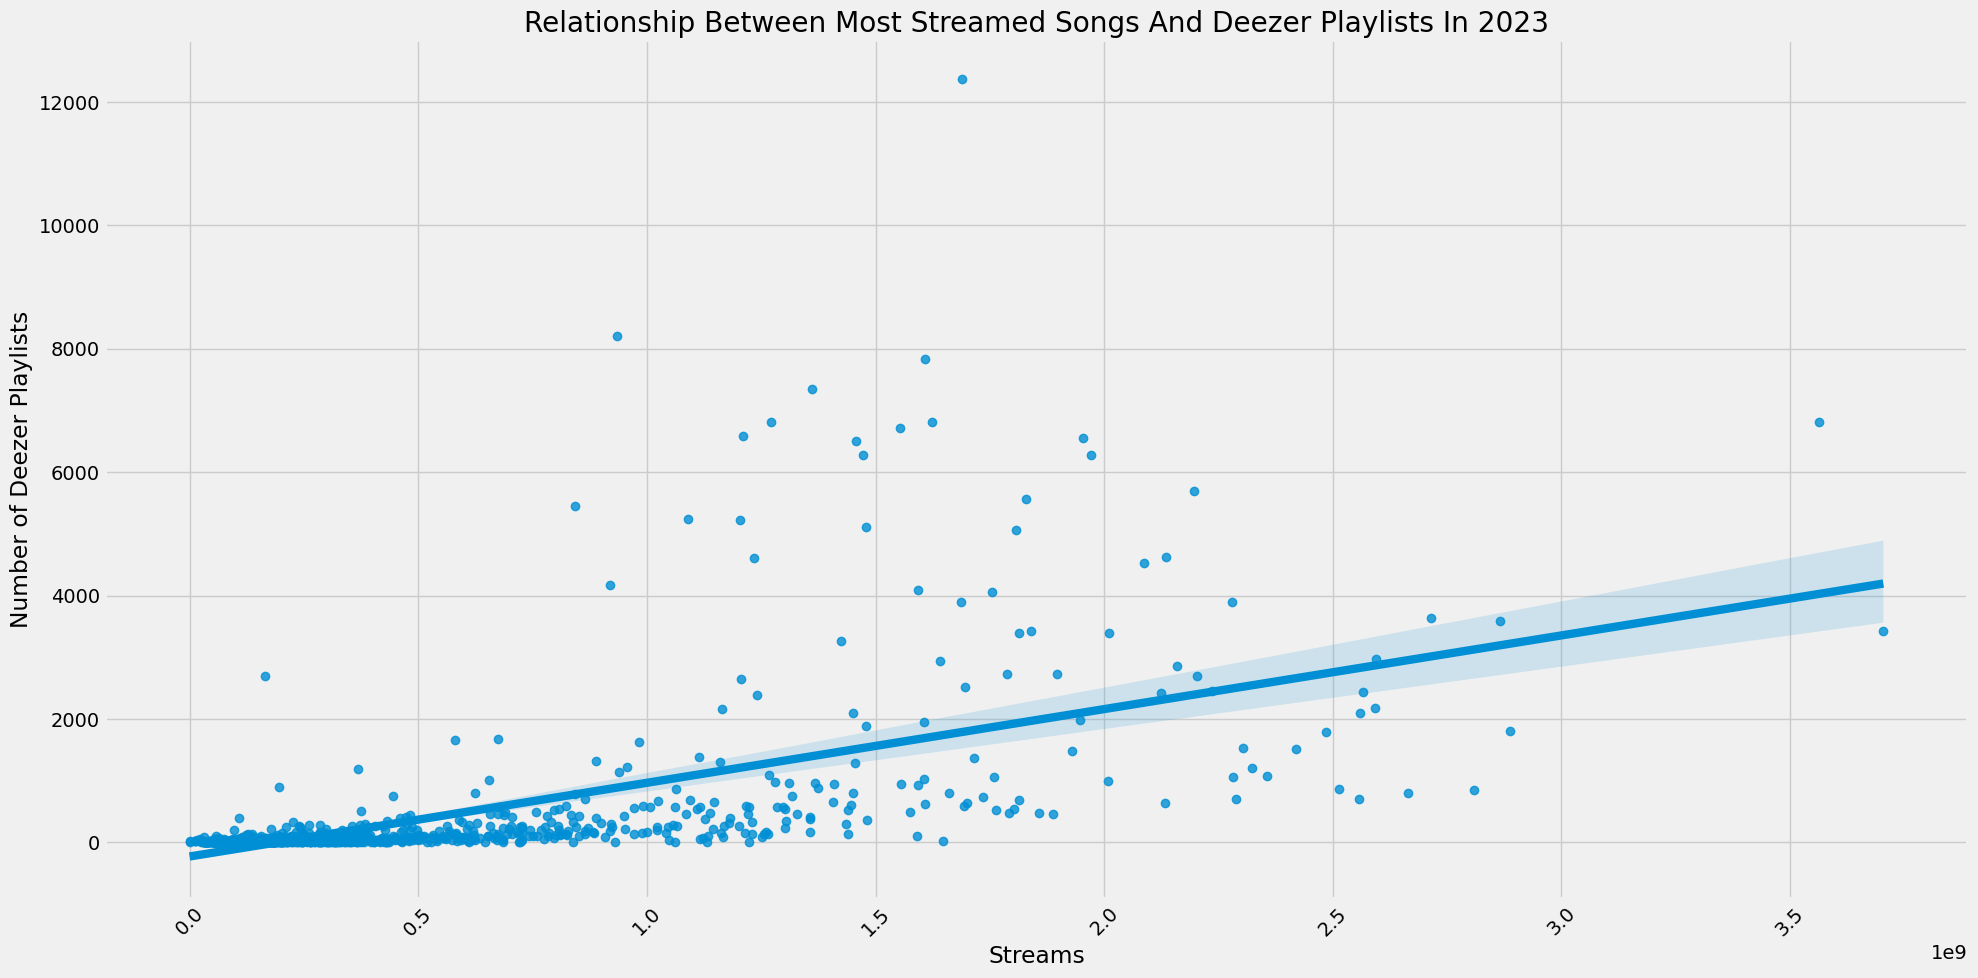

In [61]:
#the regplot (scatter plot with regression line) represents Relationship Between Most Streamed Songs And Spotify Playlists In 2023
plt.figure(figsize = (20, 10))

sns.regplot(x = 'streams', y = 'in_deezer_playlists', data = spotify_df, scatter = True, fit_reg = True)

plt.title('Relationship Between Most Streamed Songs And Deezer Playlists In 2023')
plt.xlabel('Streams')
plt.ylabel('Number of Deezer Playlists')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## Relationship Between All Audio Features🔉

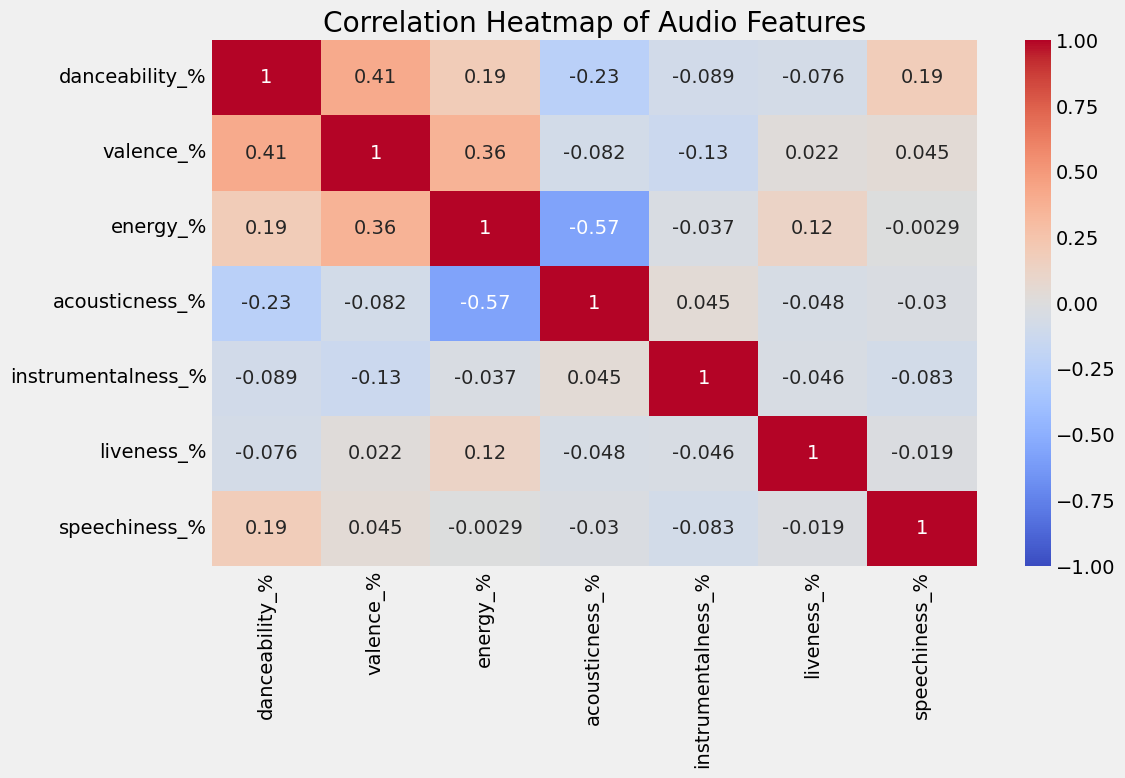

In [62]:
plt.figure(figsize = (12, 8))
corr = spotify_df[['danceability_%','valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%','liveness_%', 'speechiness_%']].corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm', vmin =- 1, vmax = 1)
plt.title('Correlation Heatmap of Audio Features')
plt.tight_layout()
plt.show()

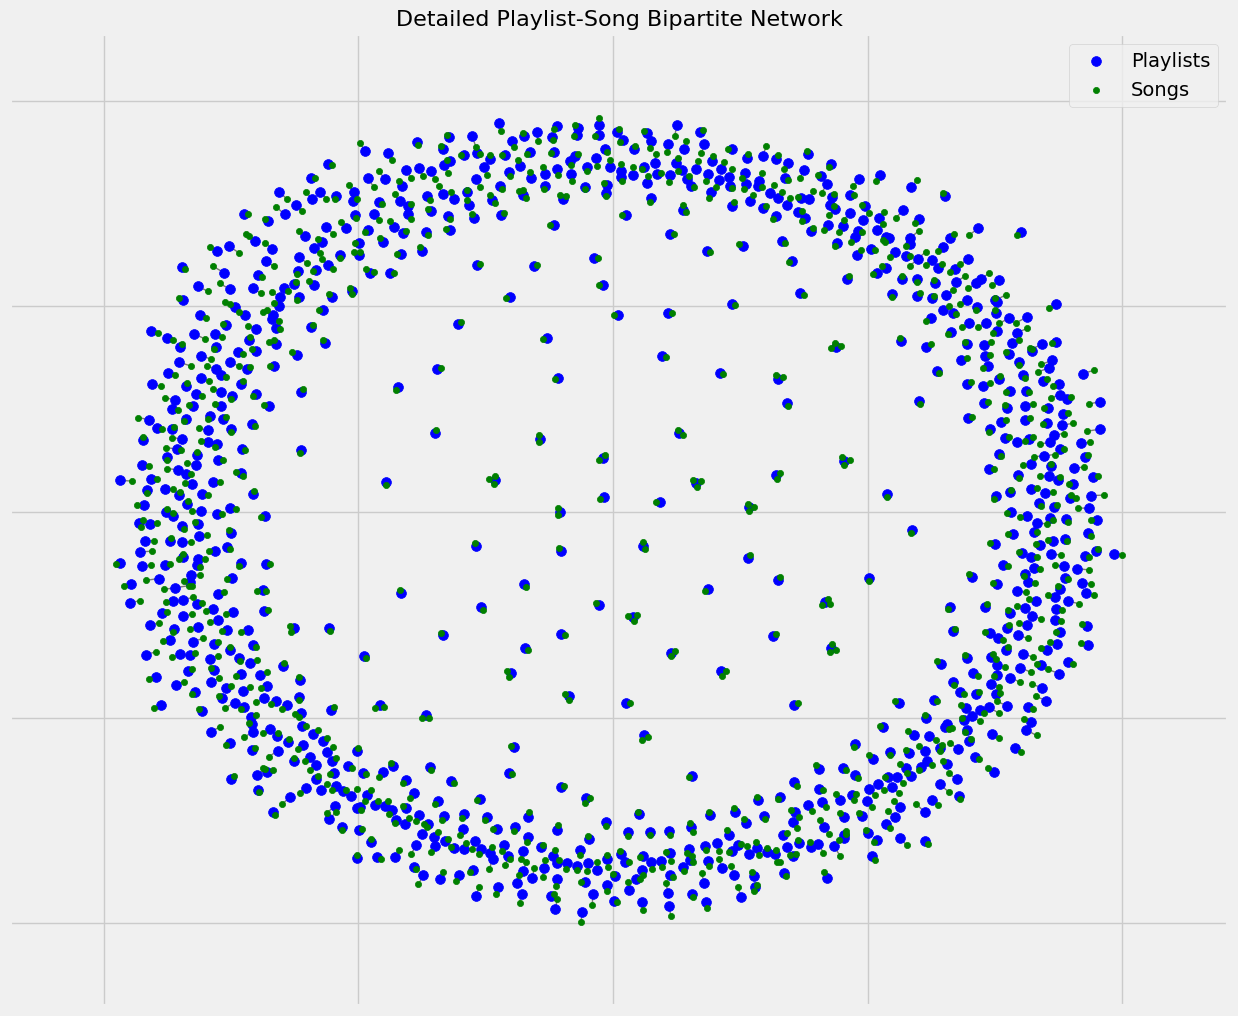

In [63]:
# Initialize a bipartite graph
B = nx.Graph()

# Add nodes and edges between playlists and songs
for index, row in spotify_df.iterrows():
    playlist_node = f"Playlist_{row['in_spotify_playlists']}"
    song_node = row['track_name']
    
    # Add nodes with attributes
    if not B.has_node(playlist_node):
        B.add_node(playlist_node, type='playlist')
    if not B.has_node(song_node):
        B.add_node(song_node, type='song', artist=row['artist(s)_name'], streams=row['streams'])
    
    # Add edge between playlist and song
    B.add_edge(playlist_node, song_node)

# Visualize the network
plt.figure(figsize=(14, 12))
pos = nx.spring_layout(B)
playlist_nodes = [node for node, attr in B.nodes(data=True) if attr['type'] == 'playlist']
song_nodes = [node for node, attr in B.nodes(data=True) if attr['type'] == 'song']

# Draw nodes and edges
nx.draw_networkx_nodes(B, pos, nodelist=playlist_nodes, node_color='blue', node_size=50, label='Playlists')
nx.draw_networkx_nodes(B, pos, nodelist=song_nodes, node_color='green', node_size=20, label='Songs')
nx.draw_networkx_edges(B, pos, alpha=0.5)
plt.title("Detailed Playlist-Song Bipartite Network", fontsize=16)
plt.legend(scatterpoints=1)
plt.show()

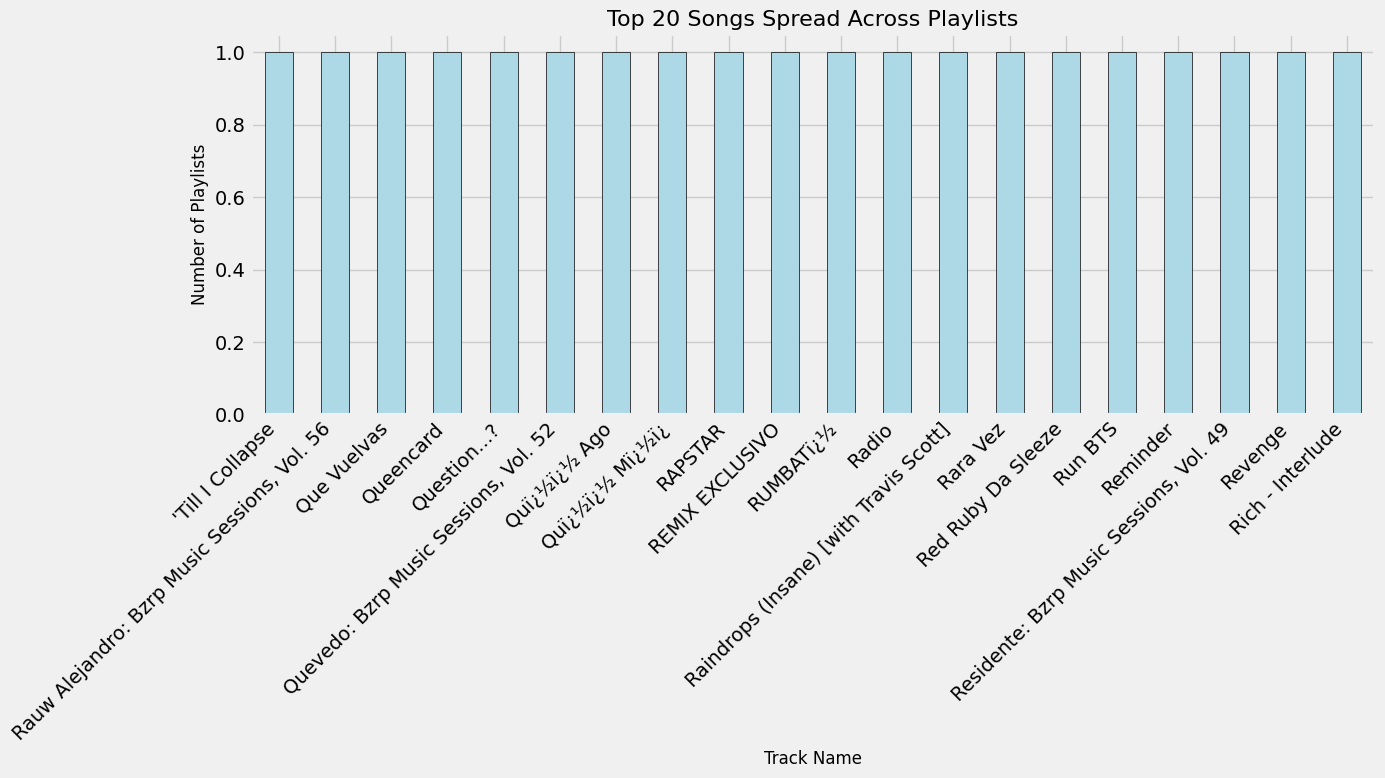

In [64]:
# Analyze the spread of top 20 songs across playlists
top_20_songs = spotify_df.groupby('track_name')['in_spotify_playlists'].count().sort_values(ascending=False).head(20)

# Visualize the top 20 songs
plt.figure(figsize=(14, 8))
top_20_songs.plot(kind='bar', color='lightblue', edgecolor='black')
plt.xlabel("Track Name", fontsize=12)
plt.ylabel("Number of Playlists", fontsize=12)
plt.title("Top 20 Songs Spread Across Playlists", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


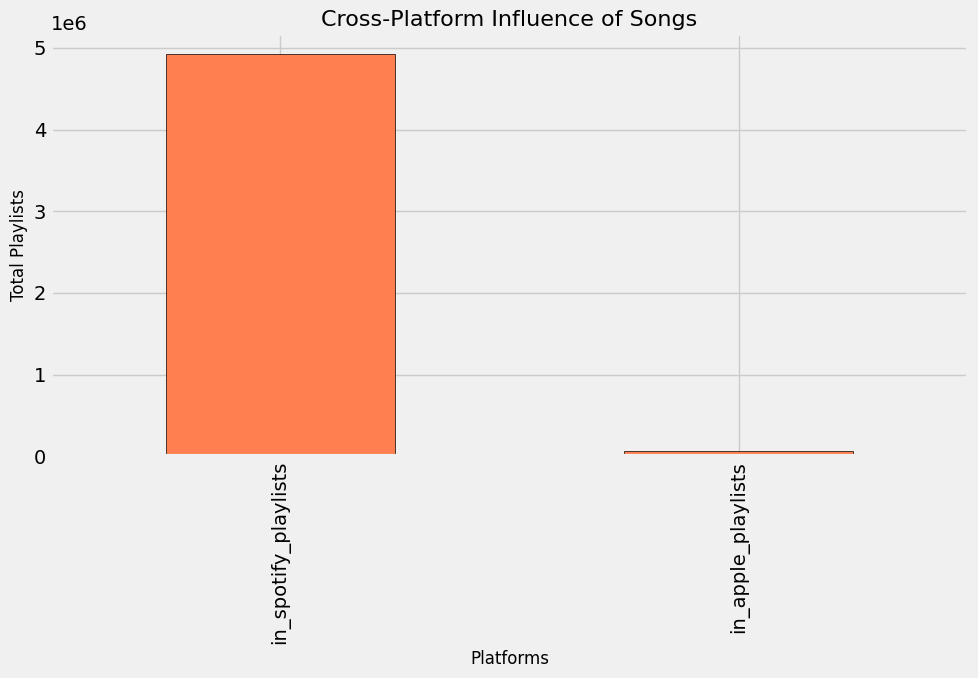

In [65]:
# Analyze cross-platform influence
platform_cols = ['in_spotify_playlists', 'in_apple_playlists']
platform_data = spotify_df[platform_cols].sum()

# Visualize cross-platform influence
plt.figure(figsize=(10, 7))
platform_data.plot(kind='bar', color='coral', edgecolor='black')
plt.xlabel("Platforms", fontsize=12)
plt.ylabel("Total Playlists", fontsize=12)
plt.title("Cross-Platform Influence of Songs", fontsize=16)
plt.tight_layout()
plt.show()


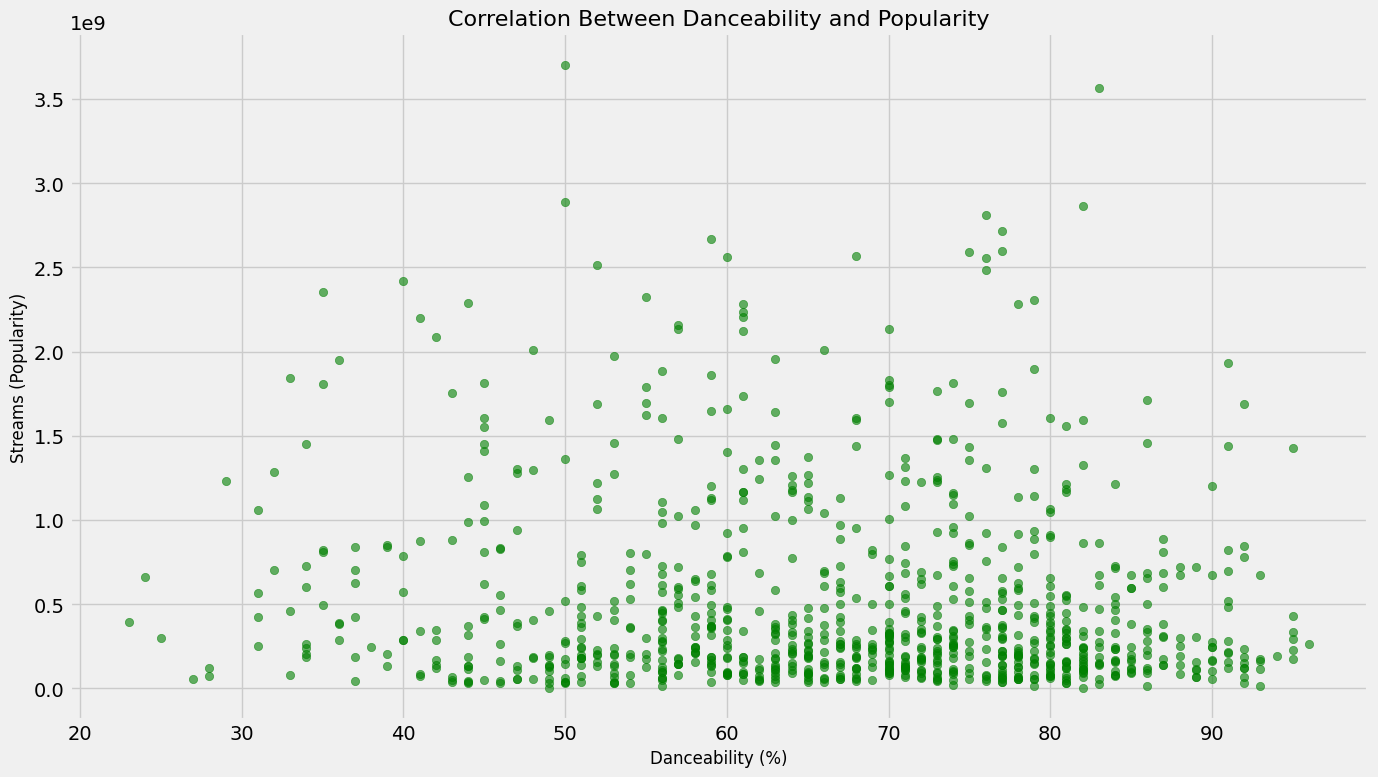

In [66]:
# Analyze correlation between danceability and popularity
spotify_df['danceability'] = pd.to_numeric(spotify_df['danceability_%'], errors='coerce')
spotify_df['popularity'] = pd.to_numeric(spotify_df['streams'], errors='coerce')

# Scatter plot for correlation
plt.figure(figsize=(14, 8))
plt.scatter(spotify_df['danceability'], spotify_df['popularity'], color='green', alpha=0.6)
plt.xlabel("Danceability (%)", fontsize=12)
plt.ylabel("Streams (Popularity)", fontsize=12)
plt.title("Correlation Between Danceability and Popularity", fontsize=16)
plt.tight_layout()
plt.show()


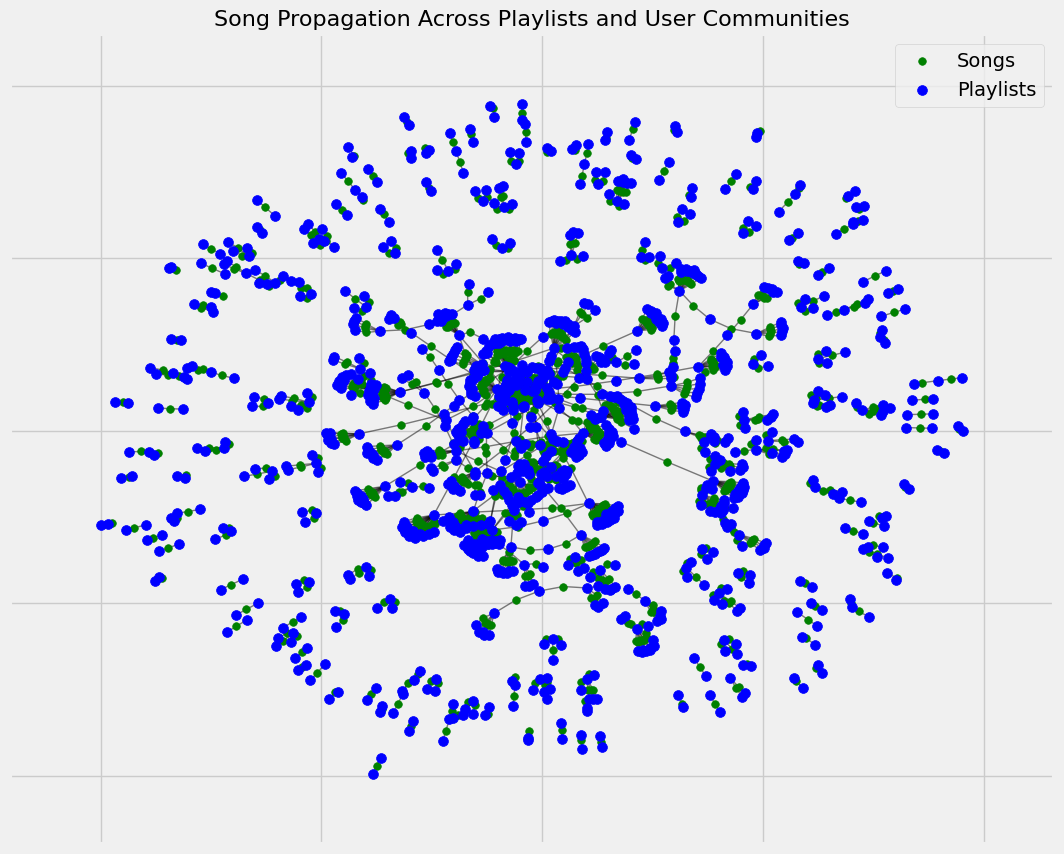

In [71]:
# Adjusting the analysis to exclude the 'genre' column since it's not in the dataset
relevant_columns = ['track_name', 'artist(s)_name', 'in_spotify_playlists', 'in_apple_playlists',
                    'danceability_%', 'energy_%', 'valence_%']
filtered_data = spotify_df[relevant_columns]

# Reconstruct the network without 'genre'
G = nx.Graph()

# Add nodes and edges based on playlists and songs
for _, row in filtered_data.iterrows():
    track = row['track_name']
    spotify_playlists = f"Spotify_{row['in_spotify_playlists']}"
    apple_playlists = f"Apple_{row['in_apple_playlists']}"
    
    # Add nodes for playlists
    if not G.has_node(spotify_playlists):
        G.add_node(spotify_playlists, type='playlist')
    if not G.has_node(apple_playlists):
        G.add_node(apple_playlists, type='playlist')
    
    # Add node for song
    if not G.has_node(track):
        G.add_node(track, type='song', artist=row['artist(s)_name'],
                   danceability=row['danceability_%'], energy=row['energy_%'], valence=row['valence_%'])
    
    # Add edges
    G.add_edge(track, spotify_playlists)
    G.add_edge(track, apple_playlists)

# Visualize the song propagation network
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G)
song_nodes = [node for node, attr in G.nodes(data=True) if attr['type'] == 'song']
playlist_nodes = [node for node, attr in G.nodes(data=True) if attr['type'] == 'playlist']

nx.draw_networkx_nodes(G, pos, nodelist=song_nodes, node_color='green', node_size=30, label='Songs')
nx.draw_networkx_nodes(G, pos, nodelist=playlist_nodes, node_color='blue', node_size=50, label='Playlists')
nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.title("Song Propagation Across Playlists and User Communities", fontsize=16)
plt.legend(scatterpoints=1)
plt.show()
